<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/deep-learning/Lab-Work/20220731-Lab-3-MTech-DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-identify-dance-form/identify-the-dance-form-deea77f8/0664343c9a8f11ea.zip

--2022-07-31 09:26:28--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-deep-learning-challenge-identify-dance-form/identify-the-dance-form-deea77f8/0664343c9a8f11ea.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.32.0
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.32.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27882564 (27M) [application/zip]
Saving to: ‘0664343c9a8f11ea.zip’

0664343c9a8f11ea.zi 100%[===================>]  26.59M  7.79MB/s    in 3.4s    

2022-07-31 09:26:32 (7.79 MB/s) - ‘0664343c9a8f11ea.zip’ saved [27882564/27882564]



In [ ]:
!unzip *.zip

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
train_df = pd.read_csv('/content/dataset/train.csv')

In [ ]:
train_df.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [ ]:
train_df.columns = ['filename', 'class']
train_df.head()

,filename,class
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [ ]:
train_df['filename'] = '/content/dataset/train/' + train_df['filename']
train_df.head()

,filename,class
0,/content/dataset/train/96.jpg,manipuri
1,/content/dataset/train/163.jpg,bharatanatyam
2,/content/dataset/train/450.jpg,odissi
3,/content/dataset/train/219.jpg,kathakali
4,/content/dataset/train/455.jpg,odissi


In [ ]:
train_df.shape

(364, 2)

In [ ]:
train_df['class'].value_counts()

mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: class, dtype: int64

In [ ]:
unique_features = train_df['class'].unique()
len(unique_features)

8

In [ ]:
sample_df = train_df.sample(16)
files = sample_df['filename'].tolist()
targets = sample_df['class'].tolist()

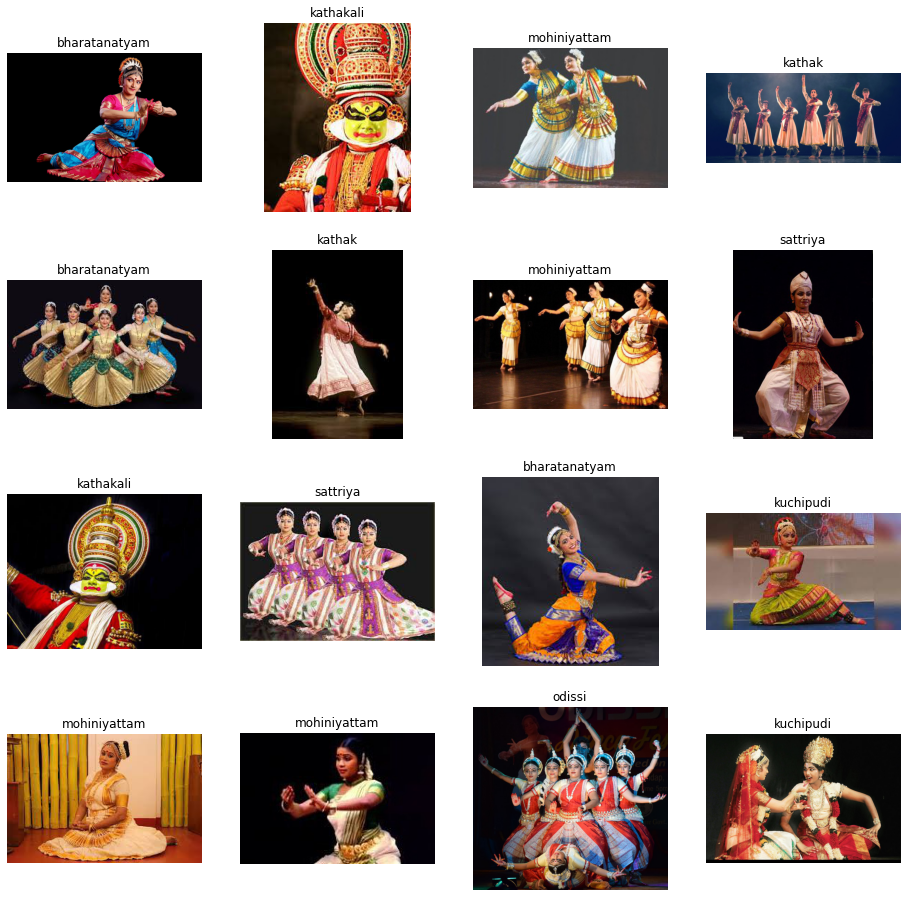

In [ ]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(nrows * 4, nrows * 4)

for i, (img_path, target) in enumerate(zip(files, targets)):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(target)

plt.show()

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/dataset/train',
    target_size=(256, 256),
    class_mode='categorical'
)

Found 364 validated image filenames belonging to 8 classes.


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(unique_features), activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 123008)            0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=100)

In [ ]:

temp = train_df.sample(frac=1)
x_train = temp[:-20].reset_index(drop=True)
x_val = temp[-20:].reset_index(drop=True)
x_train.shape, x_val.shape

((344, 2), (20, 2))

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                rotation_range=40,
                                                                horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=x_train,
    directory='/content/dataset/train',
    target_size=(256, 256),
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_dataframe(
    dataframe=x_val,
    directory='/content/dataset/train',
    target_size=(256, 256),
    class_mode='categorical'
)

Found 344 validated image filenames belonging to 8 classes.
Found 20 validated image filenames belonging to 8 classes.


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(unique_features), activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 16)                1

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=100, validation_data=val_generator)

In [ ]:
model.evaluate(val_generator)

1/1 [==============================] - 0s 121ms/step - loss: 3.4963 - accuracy: 0.3500


[3.4962592124938965, 0.3499999940395355]

In [ ]:
files[0]

'/content/dataset/train/126.jpg'

(256, 256, 3)
(1, 256, 256, 3)
(1, 254, 254, 64)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


(1, 127, 127, 64)
(1, 125, 125, 32)
(1, 62, 62, 32)


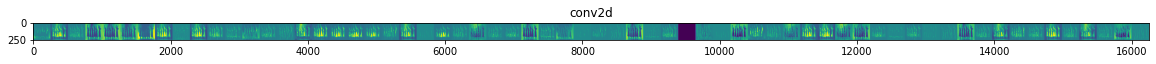

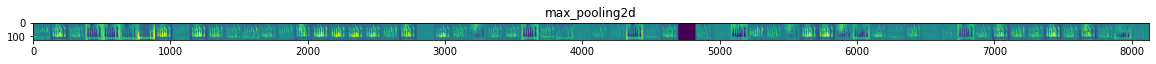

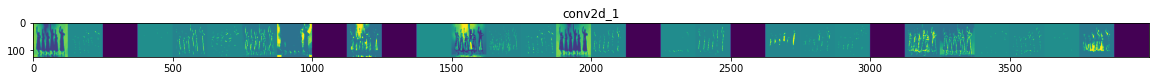

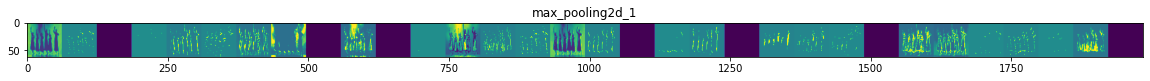

In [ ]:
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = tf.keras.preprocessing.image.load_img(files[3], target_size=(256, 256))
x = tf.keras.preprocessing.image.img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)
print(x.shape)
x /= 255
successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        print(feature_map.shape)
        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')